In [ ]:
# Mounting GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import json
import glob
import numpy as np
import cv2
import copy
import random

video_files =  glob.glob('/content/drive/MyDrive/Face_Only_Videos_40/Celeb-real/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/*.mp4')
video_files += glob.glob('/content/drive/MyDrive/Face_Only_Videos_40/YouTube-real/*.mp4')

random.shuffle(video_files)
random.shuffle(video_files)

In [ ]:
print(len(video_files))

1197


In [ ]:
frame_count = []
count = 0
less_frames = []

for video_file in video_files:
  print(count, end=' ')
  count += 1
  cap = cv2.VideoCapture(video_file)
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
  if int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) < 35:
    less_frames.append(video_file)

print()
print("\nframes are " , frame_count)
print("Total no of video: " , len(frame_count))
print('Average frame per video:',np.mean(frame_count))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
for less in less_frames:
  video_files.remove(less)

In [ ]:
len(video_files)

1186

In [ ]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=deeef89c88579f9e9a67859575caa44cbf8c58c52a0a3ce974732f89c4c86441
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
#THis code is to check if the video is corrupted or not..
#If the video is corrupted delete the video.
import glob
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
#Check if the file is corrupted or not
def validate_video(vid_path,train_transforms):
      transform = train_transforms
      count = 20
      video_path = vid_path
      frames = []
      a = int(100/count)
      first_frame = np.random.randint(0,a)
      temp_video = video_path.split('/')[-1]
      for i,frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
          break
      frames = torch.stack(frames)
      frames = frames[:count]
      return frames
#extract a from from video
def frame_extract(path):
  vidObj = cv2.VideoCapture(path)
  success = 1
  while success:
      success, image = vidObj.read()
      if success:
          yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

print("Total no of videos :" , len(video_files))
print(video_files)
count = 0;
for i in video_files:
  try:
    count+=1
    validate_video(i,train_transforms)
  except:
    print("Number of video processed: " , count ," Remaining : " , (len(video_files) - count))
    print("Corrupted video is : " , i)
    continue
print((len(video_files) - count))

Total no of videos : 1186
['/content/drive/MyDrive/Face_Only_Videos_40/Celeb-real/id13_0001.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/YouTube-real/00152.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id11_id7_0000.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id0_id9_0002.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id7_id10_0001.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id6_id3_0004.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id1_id3_0000.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id2_id16_0001.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id17_id2_0006.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id8_id0_0003.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id9_id3_0000.mp4', '/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id10_id11_0003.mp4', '/content/drive/MyDrive/Face_Only_Vid

In [ ]:
# load the video name and labels from csv
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import cv2
import matplotlib.pyplot as plt
import face_recognition

class video_dataset(Dataset):
    def __init__(self,video_names,labels,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        temp_video = './'+ '/'.join(video_path.split('/')[-3:])

        label = self.labels.iloc[(labels.loc[labels["Path"] == temp_video].index.values[0]),1]
        if(label == 'FAKE'):
          label = 0
        if(label == 'REAL'):
          label = 1
        for i,frame in enumerate(self.frame_extract(video_path)):
          frames.append(self.transform(frame))
          if(len(frames) == self.count):
            break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        # print("length:" , len(frames), "label",label)
        return frames,label
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
# plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

In [ ]:
#count the number of fake and real videos
def number_of_real_and_fake_videos(data_list):
  lab = pd.read_csv('/content/drive/MyDrive/dataset.csv')
  fake = 0
  real = 0
  for i in data_list:
    temp_video = './'+ '/'.join(i.split('/')[-3:])
    label = lab.iloc[(labels.loc[labels["Path"] == temp_video].index.values[0]),1]
    if(label == 'FAKE'):
      fake+=1
    if(label == 'REAL'):
      real+=1
  return real,fake

In [ ]:
# load the labels and video in data loader
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# header_list = ["Path","Type"]
labels = pd.read_csv('/content/drive/MyDrive/dataset.csv')

train_videos = video_files[:int(0.8*len(video_files))]
valid_videos = video_files[int(0.8*len(video_files)):]

print("train : " , len(train_videos))
print("test : " , len(valid_videos))

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos)[0]," Fake:",number_of_real_and_fake_videos(train_videos)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos)[0]," Fake:",number_of_real_and_fake_videos(valid_videos)[1])


im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

test_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

train_data = video_dataset(train_videos,labels,sequence_length = 20,transform = train_transforms)
val_data = video_dataset(valid_videos,labels,sequence_length = 20,transform = train_transforms)

train_loader = DataLoader(train_data,batch_size = 4,shuffle = True,num_workers = 2)
valid_loader = DataLoader(val_data,batch_size = 4,shuffle = True,num_workers = 2)

image,label = train_data[0]
# im_plot(image[0,:,:,:])

train :  948
test :  238
TRAIN:  Real: 301  Fake: 647
TEST:  Real: 94  Fake: 144


In [ ]:
len(train_data[0])

2

In [ ]:
train_loader

In [ ]:
video_files[2]

'/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id11_id7_0000.mp4'

In [ ]:
temp_video = './'+ '/'.join(video_files[2].split('/')[-3:])
temp_video

'./Face_Only_Videos_40/Celeb-synthesis/id11_id7_0000.mp4'

In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional) #temporial
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:01<00:00, 89.6MB/s]


In [ ]:
for i, (inputs, targets) in enumerate(train_loader):
  try:
    for tensor in inputs:
      print(tensor.shape)
  except RuntimeError as e:
      if "Trying to resize storage that is not resizable" in str(e):
                print(f"Error occurred in training batch index: {i}")
                print("Tensor shapes:")
                for tensor in inputs:
                    print(tensor.shape)
      else:
        raise e

In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    try:
      model.train()
      losses = AverageMeter()
      accuracies = AverageMeter()
      t = []
      for i, (inputs, targets) in enumerate(data_loader):
          print(targets)
          if torch.cuda.is_available():
              targets = targets.type(torch.cuda.LongTensor)
              inputs = inputs.cuda()
          _,outputs = model(inputs)
          loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
          acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
          losses.update(loss.item(), inputs.size(0))
          accuracies.update(acc, inputs.size(0))
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          sys.stdout.write(
                  "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                  % (
                      epoch,
                      num_epochs,
                      i,
                      len(data_loader),
                      losses.avg,
                      accuracies.avg))
      torch.save(model.state_dict(),'/content/checkpoint.pt')
    except RuntimeError as e:
            if "Trying to resize storage that is not resizable" in str(e):
                print(f"Error occurred in training batch index: {i}")
                print("Tensor shapes:")
                for tensor in inputs:
                    print(tensor.shape)
            else:
                raise e
    return losses.avg,accuracies.avg

def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

tensor([1, 0, 1, 0])
[Epoch 1/10] [Batch 0 / 237] [Loss: 0.705543, Acc: 50.00%]tensor([0, 1, 0, 1])
[Epoch 1/10] [Batch 1 / 237] [Loss: 0.684523, Acc: 75.00%]tensor([1, 0, 0, 0])
[Epoch 1/10] [Batch 2 / 237] [Loss: 0.704370, Acc: 66.67%]tensor([0, 0, 1, 0])
[Epoch 1/10] [Batch 3 / 237] [Loss: 0.716394, Acc: 62.50%]tensor([0, 0, 1, 0])
[Epoch 1/10] [Batch 4 / 237] [Loss: 0.732678, Acc: 50.00%]tensor([0, 0, 0, 0])
[Epoch 1/10] [Batch 5 / 237] [Loss: 0.728446, Acc: 45.83%]tensor([0, 0, 1, 0])
[Epoch 1/10] [Batch 6 / 237] [Loss: 0.732532, Acc: 42.86%]tensor([1, 0, 0, 0])
[Epoch 1/10] [Batch 7 / 237] [Loss: 0.717237, Acc: 46.88%]tensor([1, 0, 1, 0])
[Epoch 1/10] [Batch 8 / 237] [Loss: 0.715782, Acc: 47.22%]tensor([0, 0, 0, 0])
[Epoch 1/10] [Batch 9 / 237] [Loss: 0.696259, Acc: 52.50%]tensor([0, 0, 0, 0])
[Epoch 1/10] [Batch 10 / 237] [Loss: 0.678088, Acc: 56.82%]tensor([0, 0, 0, 0])
[Epoch 1/10] [Batch 11 / 237] [Loss: 0.668372, Acc: 60.42%]tensor([0, 1, 1, 1])
[Epoch 1/10] [Batch 12 / 237]

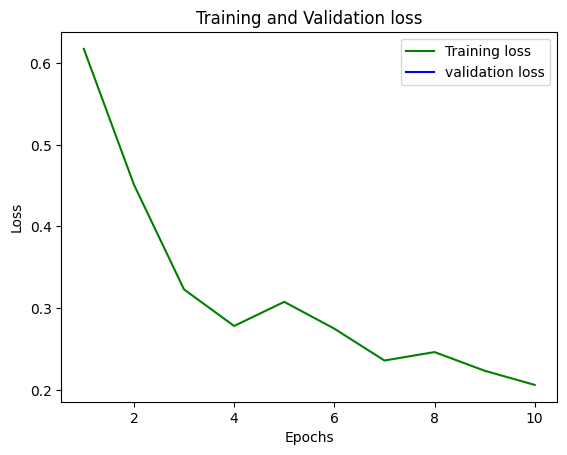

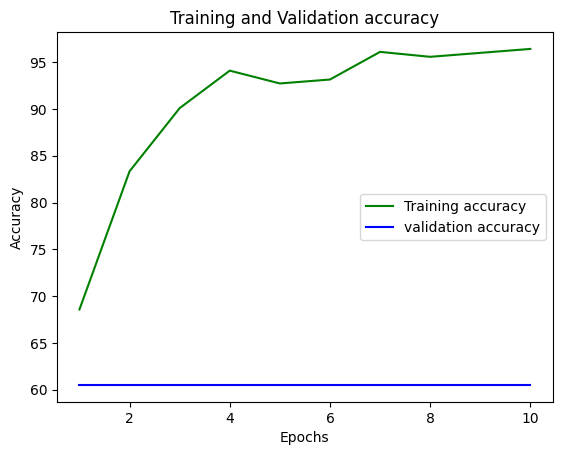

[[144   0]
 [ 94   0]]
True positive =  144
False positive =  0
False negative =  94
True negative =  0




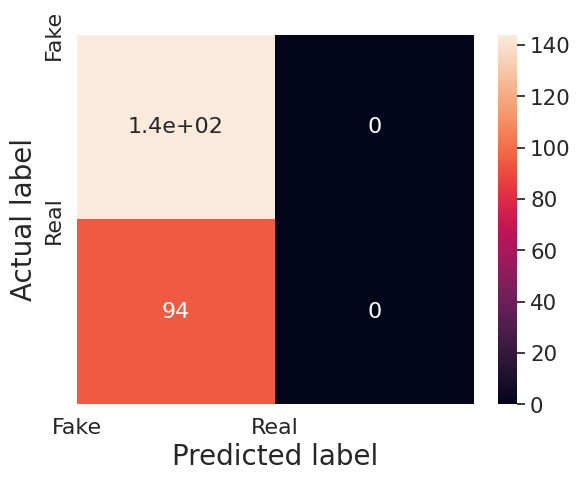

Calculated Accuracy 60.50420168067227


In [ ]:
from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 10

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)

In [ ]:
import shutil

# Specify the source path of your model file
source_path = '/content/checkpoint.pt'

# Specify the destination path in your Google Drive
destination_path = '/content/drive/MyDrive/checkpoint.pt'

# Copy the file to your Google Drive
shutil.copyfile(source_path, destination_path)

'/content/drive/MyDrive/checkpoint.pt'

In [ ]:
import os
import math

# Specify the path to your model file
model_path = '/content/checkpoint.pt'

# Get the size of the model file
model_size = os.path.getsize(model_path)

print(model_size/(1024*1024))

216.10157012939453


In [ ]:
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
sm = nn.Softmax()
inv_normalize =  transforms.Normalize(mean=-1*np.divide(mean,std),std=np.divide([1,1,1],std))
def im_convert(tensor):
    """ Display a tensor as an image. """
    image = tensor.to("cpu").clone().detach()
    image = image.squeeze()
    image = inv_normalize(image)
    image = image.numpy()
    image = image.transpose(1,2,0)
    image = image.clip(0, 1)
    cv2.imwrite('./2.png',image*255)
    return image

def predict(model,img,path = './'):
  fmap,logits = model(img.to('cuda'))
  params = list(model.parameters())
  weight_softmax = model.linear1.weight.detach().cpu().numpy()
  logits = sm(logits)
  _,prediction = torch.max(logits,1)
  confidence = logits[:,int(prediction.item())].item()*100
  print('confidence of prediction:',logits[:,int(prediction.item())].item()*100)
  idx = np.argmax(logits.detach().cpu().numpy())
  bz, nc, h, w = fmap.shape
  out = np.dot(fmap[-1].detach().cpu().numpy().reshape((nc, h*w)).T,weight_softmax[idx,:].T)
  predict = out.reshape(h,w)
  predict = predict - np.min(predict)
  predict_img = predict / np.max(predict)
  predict_img = np.uint8(255*predict_img)
  out = cv2.resize(predict_img, (im_size,im_size))
  heatmap = cv2.applyColorMap(out, cv2.COLORMAP_JET)
  img = im_convert(img[:,-1,:,:,:])
  result = heatmap * 0.5 + img*0.8*255
  cv2.imwrite('/content/1.png',result)
  result1 = heatmap * 0.5/255 + img*0.8
  r,g,b = cv2.split(result1)
  result1 = cv2.merge((r,g,b))
  plt.imshow(result1)
  plt.show()
  return [int(prediction.item()),confidence]

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
class validation_dataset(Dataset):
    def __init__(self,video_names,sequence_length = 60,transform = None):
        self.video_names = video_names
        self.transform = transform
        self.count = sequence_length
    def __len__(self):
        return len(self.video_names)
    def __getitem__(self,idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100/self.count)
        first_frame = np.random.randint(0,a)
        for i,frame in enumerate(self.frame_extract(video_path)):
            #if(i % a == first_frame):
            faces = face_recognition.face_locations(frame)
            try:
              top,right,bottom,left = faces[0]
              frame = frame[top:bottom,left:right,:]
            except:
              pass
            frames.append(self.transform(frame))
            if(len(frames) == self.count):
              break
        #print("no of frames",len(frames))
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames.unsqueeze(0)
    def frame_extract(self,path):
      vidObj = cv2.VideoCapture(path)
      success = 1
      while success:
          success, image = vidObj.read()
          if success:
              yield image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1,2,0)
    b,g,r = cv2.split(image)
    image = cv2.merge((r,g,b))
    image = image*[0.22803, 0.22145, 0.216989] +  [0.43216, 0.394666, 0.37645]
    image = image*255.0
    plt.imshow(image.astype(int))
    plt.show()

/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id0_id1_0001.mp4


<ipython-input-36-20b81cdce6ff>:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  logits = sm(logits)


confidence of prediction: nan


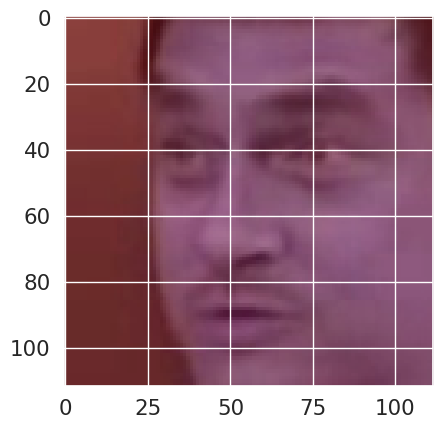

FAKE


In [ ]:
#Code for making prediction
im_size = 112
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                                        transforms.ToPILImage(),
                                        transforms.Resize((im_size,im_size)),
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean,std)])

path_to_videos= ["/content/drive/MyDrive/Face_Only_Videos_40/Celeb-synthesis/id0_id1_0001.mp4"]

video_dataset = validation_dataset(path_to_videos,sequence_length = 20,transform = train_transforms)
model = Model(2).cuda()
path_to_model = '/content/drive/MyDrive/checkpoint.pt'
model.load_state_dict(torch.load(path_to_model))
model.eval()
for i in range(0,len(path_to_videos)):
  print(path_to_videos[i])
  prediction = predict(model,video_dataset[i],'./')
  if prediction[0] == 1:
    print("REAL")
  else:
    print("FAKE")